## Lab 5.1

### Activity 1 
Name: `int-midpoint`

1. Create a python function using the `def` method that takes `x` as an input and returns the function value $f(x) =  x^2 e^x $ for $x\in[-1,1]$. 
2. Using this function create a bar plot with 20 rectangles according to the midpoint rule. Also add a line plot of $f(x)$ with an array for plotting `xp` that has 200 points.
3. Calculate the area under the curve by numerical integration using the midpoint rule. Don't use a loop. Print the result in a formatted print statement, with 4 decimals. Enter just the numerical answer into the Brighspace question `int-midpoint`.


**Solution:**

0.9137


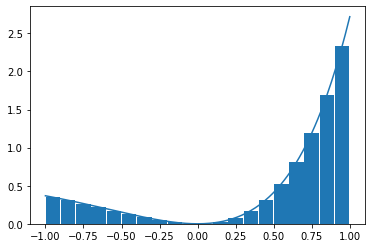

In [8]:
import numpy as np
from math import e
x = linspace(-1, 1, 21)
ifig=11;close(ifig);figure(ifig)

def f(x):
    return (x**2)*(e**x)

#plot the bar
x_mid = (x[:-1]+x[1:])/2
y_mid = f(x_mid)
plt.bar(x_mid, y_mid, width=2/21)

#plot cp with 200 points
xp = linspace(-1, 1, 201)
plt.plot(xp, f(xp))

#compute the area
dx = 2/20
mid_pt = linspace(-1+dx/2, 1-dx/2, 21)
area = np.sum(f(mid_pt)*dx)
print('%.4f'%area)

### Activity 2 
Name: `trig-circle`

![trig cirlce image](trig-circ.png)

Using the Monte Carlo method with 1000 samples determine the area covered by the green shape. The red line which outlines the shape in the upper-right quadrant is given by the $(x,y)$ points given in the file `trig-circ.dat`. Make a plot of the data in the file to make sure you have read the data correctly. Enter the answer in the quiz.


**Solution:**

In [47]:
import numpy as np
#read the dat file
file = open('trig-circ.dat', 'r')
x, y = np.loadtxt('trig-circ.dat', unpack = True)
#generate radius and theta from the data file
rad1 = sqrt(x**2+y**2)
theta1 = arctan(y/x)
#generate x-y values from random points
rng = random.default_rng()
xrad, yrad = 1.2*rng.random((2, 1000))
rad2 = sqrt(xrad**2+yrad**2)
theta2 = arctan(yrad/xrad)
#approximate
total = 0
count = 0
for i in range(1000):
    closest = abs(theta1[0]-theta2[i])
    ind = 0
    #find the closest angle theta difference
    for j in range(120):
        if abs(theta1[j]-theta2[i]) < closest:
            closest = abs(theta1[j]-theta2[i])
            ind = j
    #count the points under the curve
    start_theta = min(theta1[ind], theta2[i])
    end_theta = max(theta1[ind], theta2[i])
    for k in range(1000):
        if theta2[k]>=start_theta and theta2[k]<=end_theta:
            total+=1
            if rad2[k]<=rad1[ind]:
                count+=1
area = 4*(1.2**2)*(count/total)
print(area)

1565
2.8598984771573606
